# UTS Model Deployment
Steve Marcello Liem
260207141**0** (Genap)

### Import Library

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [117]:
df = pd.read_csv("data_C.csv")

# Data Preprocessing

In [118]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [119]:
df.tail()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
41253,41253,55217,15641043,Onyemere,641.0,Germany,Male,38.0,2,138166.30,2,0,1,69227.66,0
41254,41254,110969,15674541,Robinson,575.0,France,Male,52.0,8,0.00,2,0,1,111342.66,0
41255,41255,132494,15700601,Kao,571.0,France,Male,34.0,1,119452.03,2,1,1,173511.72,0
41256,41256,31177,15806926,Nkemjika,624.0,France,Male,38.0,4,0.00,1,0,0,40320.30,0
41257,41257,154294,15696231,Chiwetelu,668.0,France,Male,29.0,7,105405.97,1,1,1,149853.89,0


In [120]:
df.shape

(41258, 15)

Dataset ini terdiri atas 41258 samples (baris data) dengan 15 features (kolom data)

In [121]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [123]:
df.isna().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

Terdapat beberapa missing values dalam kolom `CreditScore`, dengan jumlah yang relatif kecil yaitu 12 entri. Dengan mempertimbangkan proporsi yang rendah dari missing values tersebut terhadap keseluruhan dataset, opsi yang paling tepat adalah menghapus baris yang mengandung nilai-nilai yang hilang tersebut.

Proses penghapusan ini dilakukan karena pengaruhnya yang minimal terhadap integritas data secara keseluruhan. Dengan membuang entri yang memiliki nilai yang hilang, kualitas data yang tinggi dapat dipertahankan tanpa mengorbankan signifikansi dari dataset. 

In [124]:
df.dropna(subset=['CreditScore'], inplace=True)
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Dataset sudah bersih dari missing values

In [125]:
print('Number of Duplicated Data:', df.duplicated().sum())

Number of Duplicated Data: 0


Dataset juga sudah bersih dari duplicated values. Selanjutnya, saya akan menganalisa 3 kolom pertama pada dataset ini.

In [126]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
0        1
27480    1
27502    1
27503    1
27504    1
        ..
13754    1
13755    1
13756    1
13757    1
41257    1
Name: count, Length: 41246, dtype: int64

In [127]:
df['id'].value_counts()

id
157138    1
93121     1
3217      1
41826     1
120142    1
         ..
102535    1
495       1
139839    1
69569     1
154294    1
Name: count, Length: 41246, dtype: int64

In [128]:
df['CustomerId'].value_counts()

CustomerId
15682355    32
15756901    29
15641490    26
15804787    26
15690169    25
            ..
15591119     1
15798903     1
15798737     1
15783555     1
15696231     1
Name: count, Length: 13211, dtype: int64

Ketiga kolom yang telah dianalisa unique valuenya diatas, yaitu `Unnamed: 0`, `id`, dan `CustomerId`, tidak memberikan informasi yang relevan atau bermanfaat dalam analisis data. 

Maka dari itu, ketiga kolom tersebut akan saya drop dengan alasan sebagai berikut:
1. `Unnamed: 0`: Kolom ini tampaknya merupakan indeks atau nomor baris yang dihasilkan saat menyimpan atau memuat data dari atau ke dalam format file tertentu. Informasi ini tidak memberikan kontribusi apa pun terhadap pemahaman atau analisis data, karena hanya merupakan identifikasi baris yang otomatis dihasilkan. Dalam konteks analisis data, ini dianggap sebagai metadata yang tidak relevan dan dapat diabaikan.
2. `id`: Kolom ini juga tampaknya merupakan identifikasi unik untuk setiap entitas dalam dataset, yang sering kali diperlukan dalam basis data tetapi tidak diperlukan dalam analisis data statistik atau pemodelan. Informasi ini tidak memberikan insight apa pun tentang atribut atau perilaku yang ingin kita pelajari dari data. Oleh karena itu, kolom ini dianggap tidak relevan dan dapat dihapus tanpa kehilangan informasi yang penting.
3. `CustomerId`: Sama seperti kolom 'id', kolom 'CustomerId' juga hanya berisi identifikasi unik untuk setiap pelanggan dalam dataset. Meskipun ini mungkin penting dalam konteks manajemen basis data atau dalam aplikasi bisnis tertentu, informasi ini tidak memberikan wawasan tambahan tentang perilaku atau karakteristik pelanggan yang relevan dalam analisis data. Oleh karena itu, kolom ini juga dianggap tidak relevan dan dapat dihapus untuk menyederhanakan dataset.

In [129]:
df.drop(columns=['Unnamed: 0', 'id', 'CustomerId'], inplace=True)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [130]:
df[df['churn']==1]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
19,Tung,646.0,Germany,Female,47.0,1,133970.23,1,0,0,172576.43,1
25,Hughes,602.0,Germany,Male,26.0,8,113674.20,1,1,0,197861.16,1
28,Okechukwu,733.0,France,Female,22.0,2,0.00,2,1,0,117202.19,1
35,Fanucci,634.0,France,Male,40.0,4,0.00,1,0,0,168780.04,1
36,Ch'eng,651.0,Germany,Male,48.0,5,111565.91,1,1,1,91566.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41212,Fu,589.0,Spain,Female,29.0,6,157576.47,2,1,1,101102.39,1
41225,Taylor,543.0,Spain,Female,46.0,5,0.00,1,0,0,143980.29,1
41229,Shih,481.0,France,Female,43.0,2,0.00,2,1,0,122937.57,1
41230,Fiorentini,697.0,France,Male,46.0,0,0.00,1,1,0,76640.29,1


Ketiga kolom ID dan Index tersebut sudah didrop dan dataset menjadi lebih sederhana. 

In [131]:
df['Surname'].value_counts()

Surname
Hsia           635
T'ien          571
Maclean        430
Kao            405
Hs?            397
              ... 
Gearhart         1
Vinogradov       1
Horan            1
Christopher      1
Igwebuike        1
Name: count, Length: 2272, dtype: int64

Karena tugas utama adalah untuk membuat model klasifikasi churn nasabah, maka kolom `Surname` dapat **dihapus** karena tidak memberikan kontribusi yang signifikan terhadap tujuan prediksi churn nasabah, dengan alasan sebagai berikut:

1. **Tidak Berkorelasi dengan Churn**: Nama belakang atau 'Surname' pelanggan tidak memiliki korelasi langsung dengan keputusan pelanggan untuk beralih atau tidak. Faktor-faktor seperti pengalaman pelanggan dengan layanan bank, kepuasan pelanggan, atau kebutuhan finansial yang lebih besar cenderung memiliki pengaruh yang lebih besar terhadap keputusan churn.

2. **Tidak Menyediakan Informasi yang Dibutuhkan**: Dalam konteks prediksi churn, yang lebih penting adalah informasi yang berkaitan langsung dengan perilaku dan karakteristik pelanggan, seperti riwayat transaksi, saldo rekening, aktivitas akun, dan sebagainya. Nama belakang tidak memberikan wawasan tambahan tentang perilaku atau kecenderungan pelanggan yang dapat digunakan dalam membangun model churn.

In [132]:
df.drop(columns=['Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [133]:
for column in df.columns:
    unique = df[column].value_counts()
    print("Column", column, ":", unique)
    print('')

Column CreditScore : CreditScore
850.0    594
678.0    561
684.0    459
667.0    408
683.0    395
        ... 
424.0      1
475.0      1
441.0      1
367.0      1
427.0      1
Name: count, Length: 444, dtype: int64

Column Geography : Geography
France     23459
Spain       9055
Germany     8732
Name: count, dtype: int64

Column Gender : Gender
Male      23215
Female    18031
Name: count, dtype: int64

Column Age : Age
37.00    2349
38.00    2315
35.00    2240
34.00    2148
36.00    2134
         ... 
83.00       1
84.00       1
85.00       1
36.44       1
81.00       1
Name: count, Length: 71, dtype: int64

Column Tenure : Tenure
7     4516
2     4467
8     4423
5     4293
4     4252
9     4238
1     4177
3     4114
6     3959
10    1490
0     1317
Name: count, dtype: int64

Column Balance : Balance
0.00         22459
124577.33       26
129855.32       20
122314.50       18
127864.40       16
             ...  
103421.80        1
142996.63        1
124197.26        1
125879.29        1

# Exploratory Data Analysis

In [134]:
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure','churn']
numeric_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns)

Categorical columns: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'churn']
Numeric columns: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


Saya melakukan pemisahan untuk column numerical dan categorical untuk memudahkan dalam proses analisis

### Numerical

**Descriptive Statistics**

In [135]:
df[numeric_columns].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,41246.000000,41246.000000,41246.000000,41246.000000
mean,655.802890,38.165756,55325.056912,112501.152620
std,79.736298,8.948366,62797.577187,50046.043576
min,350.000000,18.000000,0.000000,11.580000
25%,597.000000,32.000000,0.000000,74564.410000
50%,659.000000,37.000000,0.000000,117616.290000
75%,710.000000,43.000000,119785.470000,154686.185000
max,850.000000,92.000000,238387.560000,199992.480000


Dari descriptive statistics di atas, saya memperoleh beberapa insight:

1. **CreditScore**:
   - Rata-rata skor kredit pelanggan adalah sekitar 655.8.
   - Skor kredit memiliki rentang yang cukup besar dari 350 hingga 850.
   - Standar deviasi yang relatif rendah menunjukkan bahwa sebagian besar skor kredit berada dalam kisaran yang tidak terlalu jauh dari rata-rata.

2. **Age**:
   - Rata-rata usia pelanggan adalah sekitar 38 tahun.
   - Usia pelanggan bervariasi dari 18 hingga 92 tahun.
   - Distribusi usia cenderung lebih condong ke arah yang lebih muda, dengan persentil ke-25 (25%) berada pada usia 32 tahun.

3. **Balance**:
   - Rata-rata saldo rekening pelanggan adalah sekitar $55,325.
   - Ada sebagian besar pelanggan yang memiliki saldo rekening nol (0), karena nilai median dan persentil ke-25 semuanya adalah 0.
   - Standar deviasi yang cukup besar menunjukkan adanya variasi yang signifikan dalam saldo rekening.

4. **EstimatedSalary**:
   - Rata-rata perkiraan gaji pelanggan adalah sekitar $112,501.
   - Gaji yang diprediksi memiliki rentang dari $11.58 hingga $199,992.48.
   - Distribusi gaji cenderung terdistribusi lebih merata dibandingkan dengan saldo rekening, dengan nilai median yang lebih mendekati rata-rata.


**Data Distribution using Histogram**

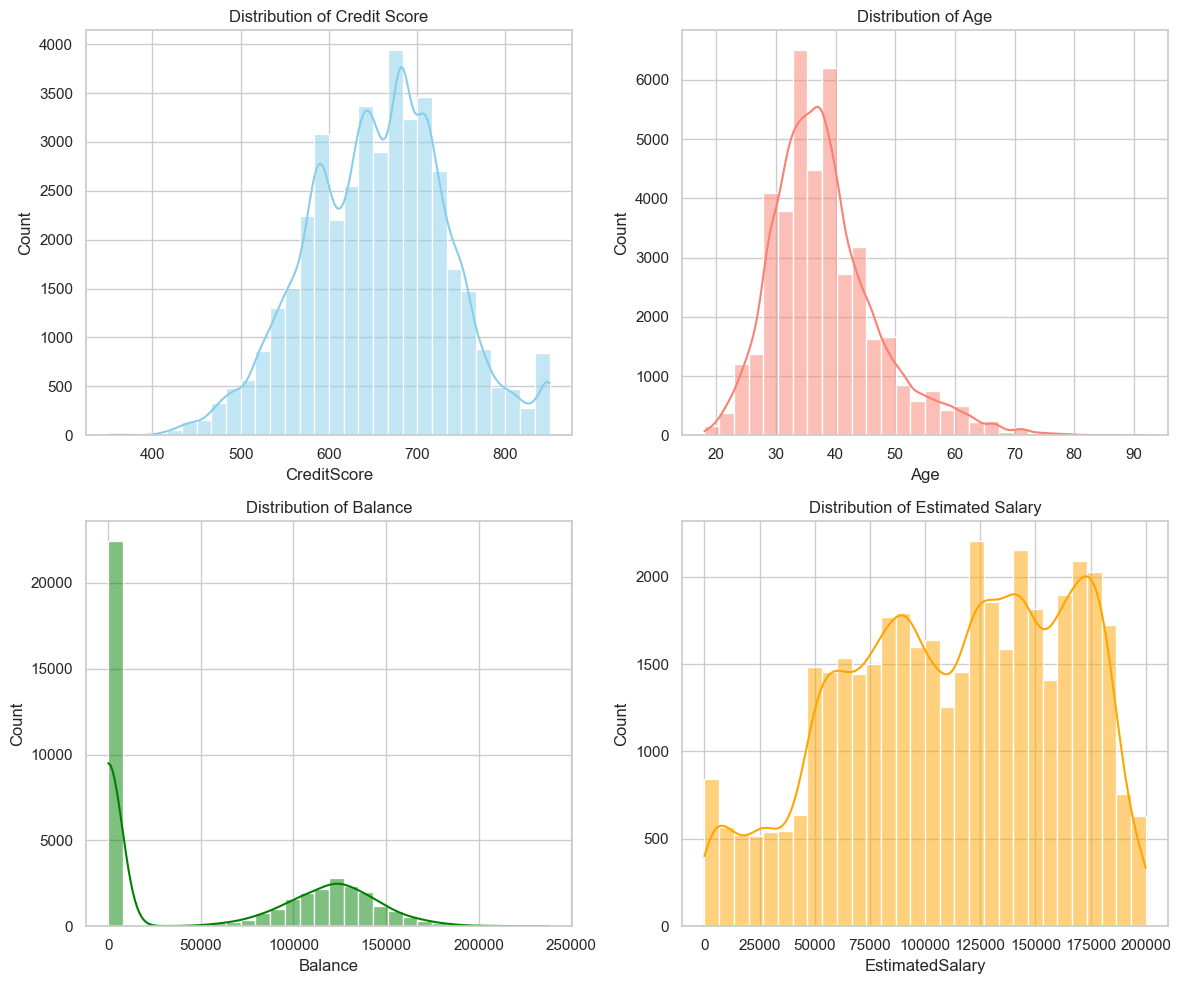

In [136]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='CreditScore', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Credit Score')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Age', kde=True, color='salmon', bins=30)
plt.title('Distribution of Age')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Balance', kde=True, color='green', bins=30)
plt.title('Distribution of Balance')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='EstimatedSalary', kde=True, color='orange', bins=30)
plt.title('Distribution of Estimated Salary')

plt.tight_layout()
plt.show()

Pengamatan tentang persebaran data yang berbeda-beda dari kolom ke kolom dapat memberikan wawasan yang berharga tentang karakteristik dataset. Berikut adalah beberapa insight yang dapat diperoleh dari perbedaan dalam persebaran data untuk kolom 'Balance' dan 'EstimatedSalary':

1. `Balance` (Saldo Rekening):
   - Distribusi data memiliki ekor ke kanan (right-tailed), yang menunjukkan adanya sejumlah besar pelanggan dengan saldo rekening yang rendah atau bahkan nol.
   - Ini mengindikasikan bahwa sebagian besar pelanggan mungkin tidak memiliki banyak uang di rekening mereka atau bahkan tidak menggunakan rekening mereka secara aktif.
   - Kemungkinan besar ada segmen pelanggan yang tidak menggunakan layanan keuangan bank secara intensif atau mungkin menggunakan jenis layanan yang tidak berkaitan dengan tabungan atau investasi.

2. `EstimatedSalary` (Perkiraan Gaji):
   - Distribusi data memiliki ekor ke kiri (left-tailed), yang menunjukkan adanya sejumlah besar pelanggan dengan gaji yang rendah.
   - Hal ini dapat menunjukkan adanya ketimpangan ekonomi di antara pelanggan, di mana sebagian besar pelanggan memiliki gaji yang rendah.
   - Perbedaan besar dalam perkiraan gaji dapat mempengaruhi perilaku keuangan dan keputusan pelanggan, seperti tingkat tabungan, kecenderungan untuk menggunakan produk keuangan tertentu, atau kemungkinan untuk melakukan churn.
3. `Age` (Usia):
   - Distribusi data memiliki bentuk yang cukup simetris dan mirip dengan kurva normal (bell-shaped), menunjukkan bahwa sebagian besar pelanggan berada dalam rentang usia yang seragam.
   - Pelanggan yang lebih muda cenderung lebih banyak dibandingkan dengan pelanggan yang lebih tua, yang tercermin dari posisi median dan persentil ke-25 yang berada di bawah rata-rata usia.
   - Analisis lebih lanjut dapat dilakukan untuk memahami dampak usia terhadap perilaku keuangan pelanggan, seperti kecenderungan untuk menggunakan produk atau layanan tertentu, risiko churn, atau profil risiko kredit.
4. `CreditScore` (Skor Kredit):
   - Distribusi data juga memiliki pola yang simetris dan mirip dengan kurva normal, menunjukkan bahwa sebagian besar pelanggan memiliki skor kredit yang beragam tetapi relatif seragam.
   - Rata-rata skor kredit yang tinggi dan standar deviasi yang cukup rendah menunjukkan bahwa sebagian besar pelanggan memiliki skor kredit yang baik, dengan variasi yang tidak terlalu signifikan.
   - Skor kredit yang tinggi dapat mengindikasikan kualitas kredit yang baik, yang dapat mempengaruhi akses pelanggan terhadap produk dan layanan keuangan tertentu, serta tingkat risiko churn.

**Check Outliers using Boxplot**

### Categorical

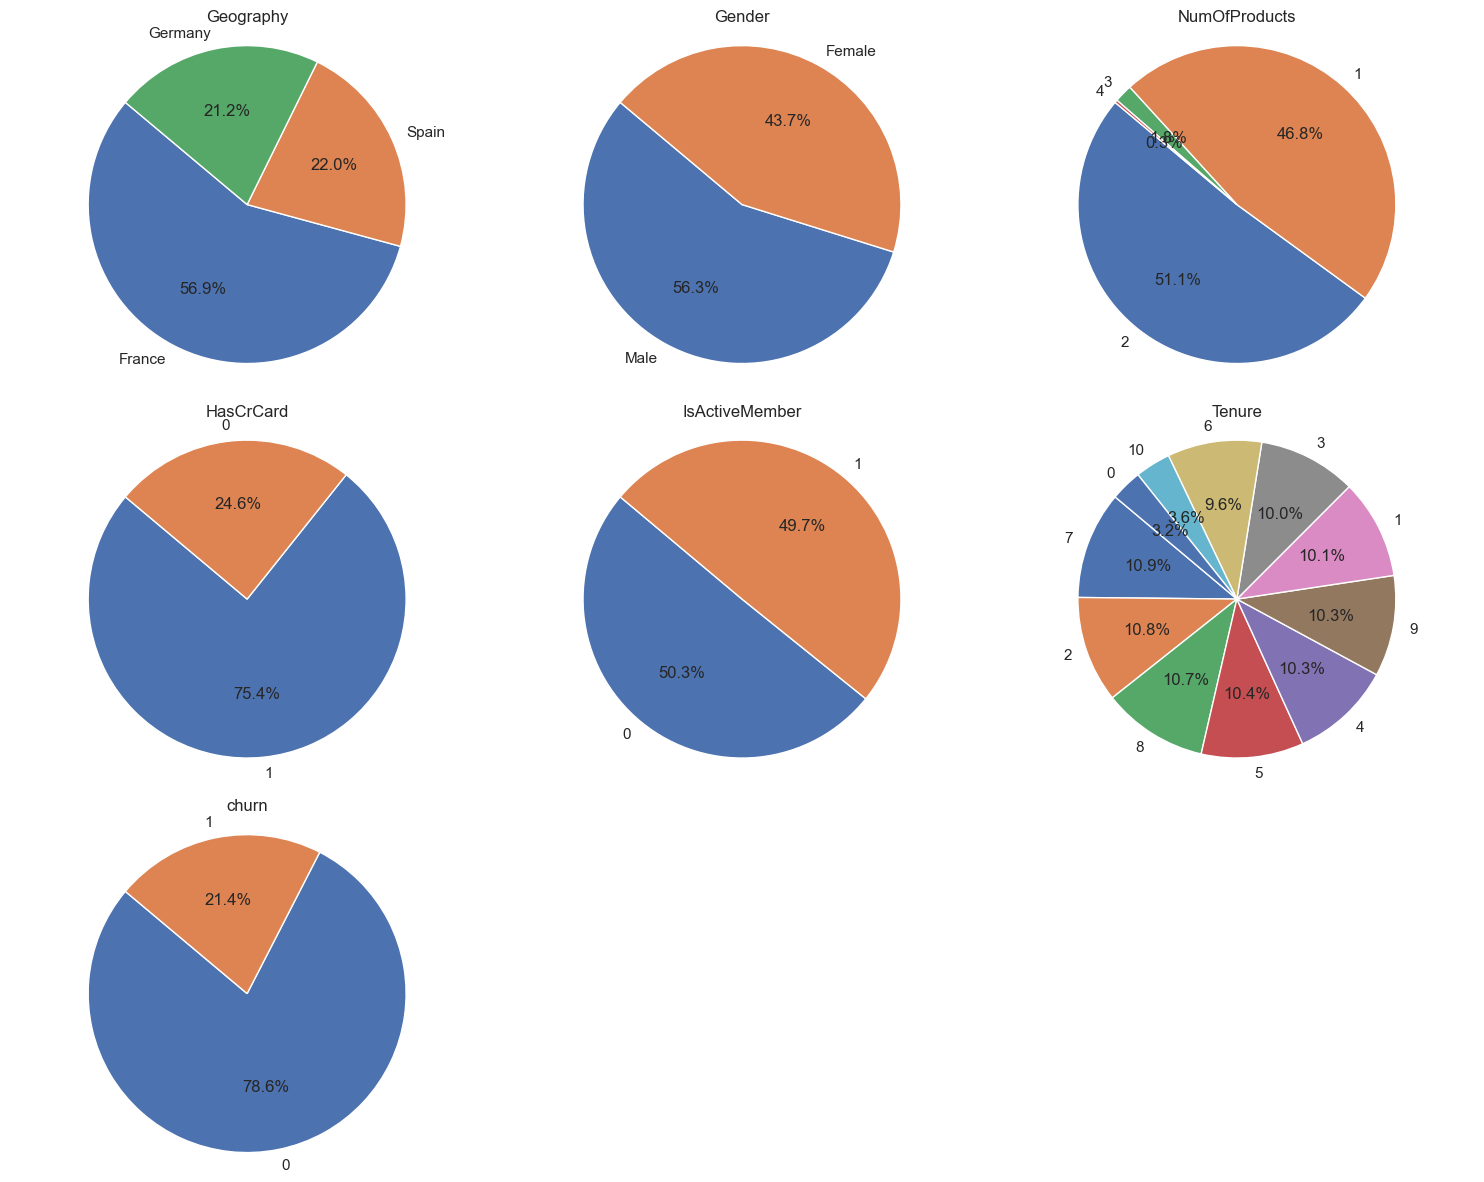

In [137]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    plt.title(column)
    plt.pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.tight_layout()
plt.show()

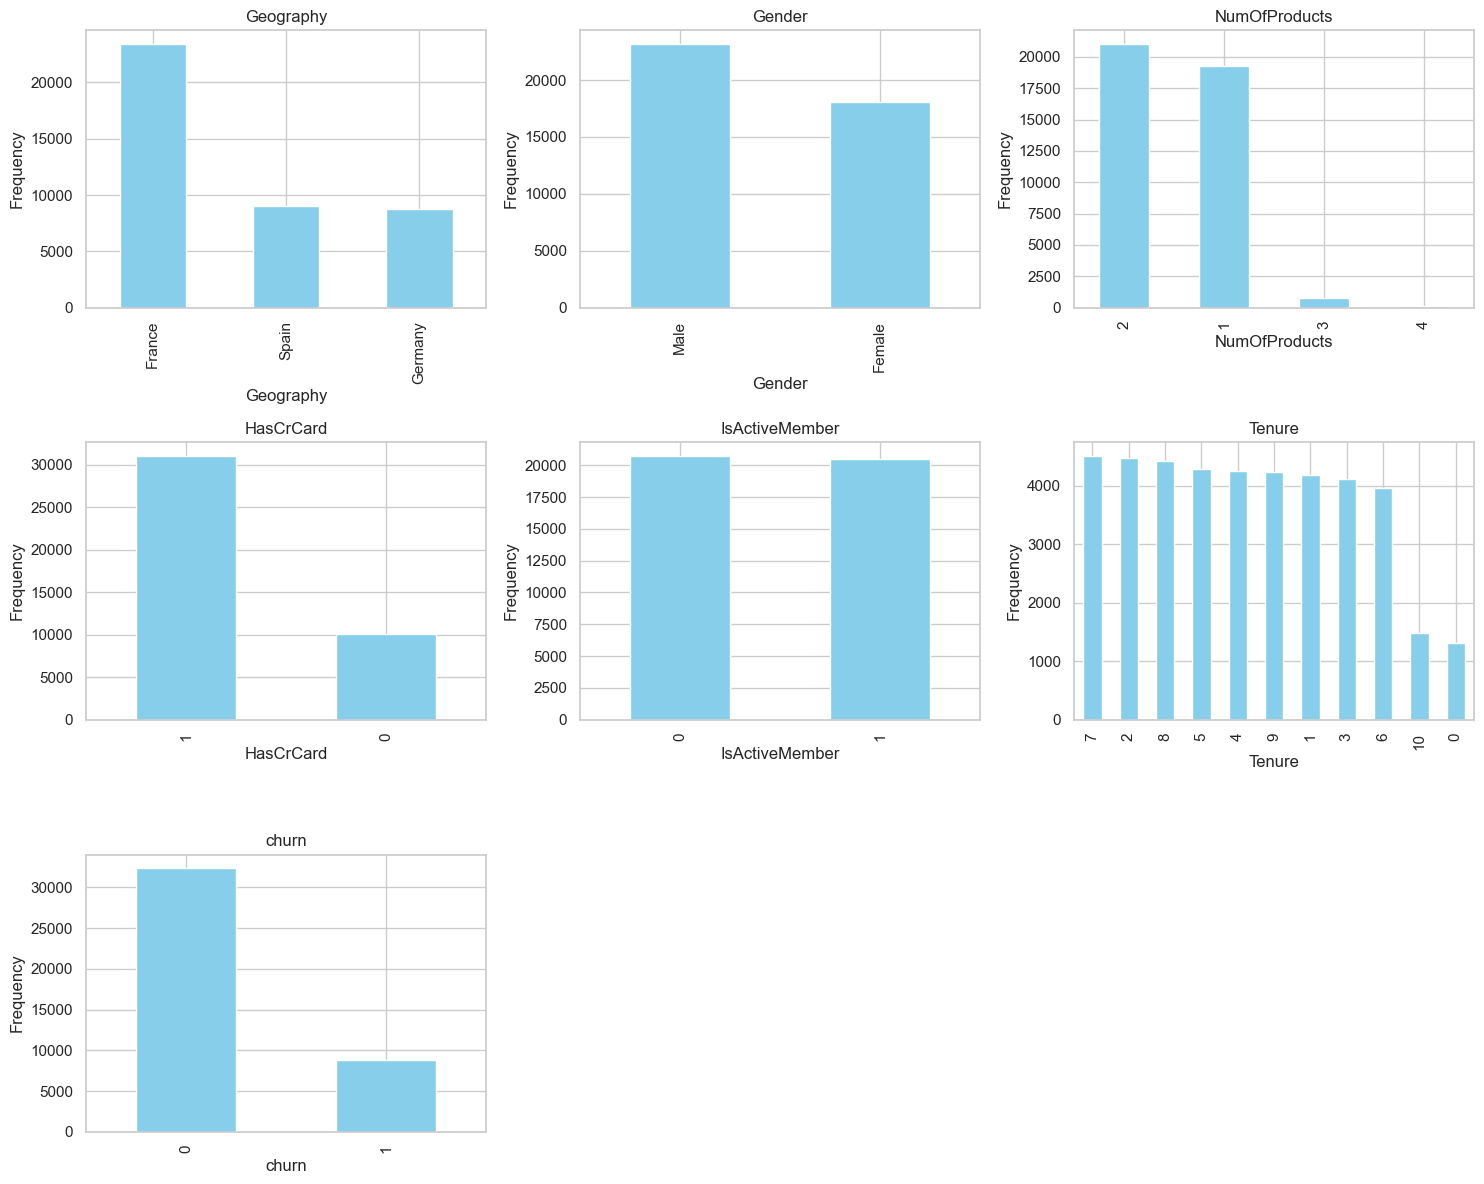

In [138]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    plt.title(column)
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.ylabel('Frequency')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.show()

Berdasarkan hasil EDA, saya dapat menyimpulkan beberapa temuan penting tentang karakteristik pelanggan dalam dataset:

1. **Geography**:
   - Distribusi frekuensi pelanggan menurut negara menunjukkan bahwa sebagian besar pelanggan berasal dari France, diikuti oleh Spain dan Germany.
   - Meskipun France memiliki jumlah pelanggan tertinggi, perbedaan antara frekuensi pelanggan di negara Spain dan Germany cukup kecil, menunjukkan bahwa bank memiliki pangsa pasar yang signifikan di kedua negara ini.

2. **Gender**:
   - Analisis menunjukkan bahwa jumlah pelanggan dengan jenis kelamin male lebih banyak daripada female dalam dataset.
   - Informasi ini dapat membantu bank dalam menyusun strategi pemasaran yang lebih terfokus dan memperhitungkan preferensi atau kebutuhan yang mungkin berbeda antara kedua jenis kelamin.

3. **NumOfProducts**:
   - Distribusi frekuensi jumlah produk yang dimiliki oleh pelanggan menunjukkan bahwa sebagian besar pelanggan memiliki 1 atau 2 produk, dengan jumlah pelanggan yang memiliki 3 atau 4 produk relatif sedikit.
   - Temuan ini dapat mengindikasikan preferensi produk tertentu di antara pelanggan, dan bank dapat menggunakan informasi ini untuk mengoptimalkan penawaran produk atau menyesuaikan strategi pemasaran.

4. **HasCrCard**:
   - Analisis menunjukkan bahwa mayoritas pelanggan memiliki kartu kredit, dengan jumlah pelanggan yang tidak memiliki kartu kredit relatif sedikit.
   - Ini menunjukkan bahwa layanan kartu kredit mungkin menjadi produk yang populer di antara pelanggan, dan bank dapat mempertimbangkan untuk mengembangkan atau memperkuat layanan ini lebih lanjut.

5. **IsActiveMember**:
   - Distribusi keaktifan anggota menunjukkan bahwa sebagian besar pelanggan adalah anggota yang aktif, namun jumlah pelanggan yang tidak aktif juga signifikan.
   - Informasi ini penting karena pelanggan yang aktif cenderung lebih terlibat dan cenderung mempertahankan hubungan dengan bank. Bank dapat mengambil langkah-langkah untuk meningkatkan keaktifan pelanggan yang tidak aktif.

6. **Tenure**:
   - Durasi pelayanan (tenure) menunjukkan variasi yang signifikan, dengan rentang 7 bulan menjadi yang tertinggi diikuti oleh 2 bulan dan 8 bulan.
   - Ini mengindikasikan bahwa sebagian besar pelanggan telah menggunakan layanan bank untuk jangka waktu yang signifikan, sementara sebagian kecil lainnya mungkin baru saja bergabung atau memiliki hubungan yang lebih pendek.

7. **Churn**:
   - Terdapat ketidakseimbangan kelas pada target churn, di mana sebagian besar pelanggan tidak melakukan churn (0), sementara sekitar 21% pelanggan melakukan churn (1).
   - Ketidakseimbangan kelas ini dapat menyebabkan model yang tidak seimbang dan penilaian yang bias. Oleh karena itu, langkah-langkah khusus seperti oversampling atau penggunaan metrik evaluasi yang tepat diperlukan dalam pemodelan untuk meminimalkan dampaknya.

# Split Data into Train and Test Data

Splitting data sebelum melakukan feature engineering sangat penting untuk mencegah kebocoran informasi dari set test set ke dalam proses training model. Hal ini memastikan splitting yang jelas antara data yang digunakan untuk pengembangan model (train set) dan data yang belum pernah dilihat yang digunakan untuk evaluasi (test set). Dengan melakukan feature engineering hanya pada train set, dapat dipastikan bahwa model belajar dari pola-pola yang sesungguhnya dalam data tanpa memasukkan informasi yang seharusnya tidak boleh diakses oleh model. Hal ini menjaga integritas proses evaluasi, memungkinkan penilaian yang lebih akurat terhadap kinerja model pada data baru yang belum pernah dilihat sebelumnya.

In [139]:
input = df.drop('churn', axis = 1)
output = df['churn']

x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [140]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (32996, 10)
x_test:  (8250, 10)
y_train:  (32996,)
y_test:  (8250,)


# Feature Engineering

### Feature Encoding (Binary Encoding)

Untuk variabel kategorikal seperti Gender (jenis kelamin) di mana hanya terdapat dua nilai kategorikal yang mungkin (misalnya, Male dan Female), menggunakan binary encoding bisa menjadi pilihan yang lebih efisien. Dalam binary encoding, satu kolom baru cukup untuk merepresentasikan variabel ini, di mana nilai-nilai kategorikal dikodekan menjadi bilangan biner (0 atau 1) secara berurutan. Misalnya, jika menggunakan binary encoding, kita hanya memerlukan satu kolom baru di mana nilai Male direpresentasikan dengan 0 dan nilai Female direpresentasikan dengan 1, atau sebaliknya.

In [141]:
BinaryEncode = {"Gender": {"Male" : 1,"Female" :0}}
x_train = x_train.replace(BinaryEncode)
x_test = x_test.replace(BinaryEncode)   

In [142]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
41120,638.0,France,0,37.0,0,0.00,2,1,0,97767.63
6084,674.0,Germany,1,44.0,3,88902.21,1,1,1,73731.32
8104,637.0,Germany,1,28.0,5,128745.69,2,1,0,181224.56
23634,508.0,France,1,71.0,9,0.00,2,1,1,38772.61
23943,653.0,France,1,37.0,3,0.00,2,1,1,74846.64


In [143]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
24999,652.0,Germany,0,28.0,4,114206.84,1,0,0,160670.37
8730,599.0,France,1,49.0,10,0.00,1,1,0,161519.50
3583,639.0,Germany,1,35.0,9,106068.42,1,1,1,166909.32
35209,676.0,Germany,1,40.0,2,108477.47,2,0,1,135062.02
29762,473.0,France,0,43.0,1,80764.03,1,1,0,199378.58


In [144]:
filename = 'gender_encoder.pkl'
pkl.dump(BinaryEncode, open(filename, 'wb'))

In [169]:
HasCrCardEncode = {"HasCrCard": {"Yes":1,"No" :0}}
filename = 'hasCrCard_encoder.pkl'
pkl.dump(HasCrCardEncode, open(filename, 'wb'))

In [170]:
IsActiveMemberEncode = {"IsActiveMember": {"Yes":1,"No" :0}}
filename = 'isActiveMember_encoder.pkl'
pkl.dump(IsActiveMemberEncode, open(filename, 'wb'))

### Feature Encoding (One Hot Encoding)

One hot encoding adalah sebuah teknik yang digunakan dalam pengolahan data untuk mengubah variabel kategorikal menjadi bentuk yang lebih sesuai untuk digunakan dalam model machine learning. Ketika memiliki variabel kategorikal seperti `Geography` (negara) di mana tidak ada urutan atau tingkatan yang bermakna antara nilai-nilai kategorikal tersebut, maka tidak bisa secara langsung menganggapnya sebagai variabel numerik karena akan menimbulkan ambiguitas. Oleh karena itu, dapat digunakan teknik one hot encoding.

Dalam one hot encoding, setiap nilai unik dalam variabel kategorikal dipetakan ke dalam kolom baru. Jika memiliki tiga negara (Germany, France, Spain), maka akan dibuat tiga kolom baru, masing-masing untuk mewakili keberadaan atau ketiadaan setiap negara. Misalnya, jika data berisi pelanggan dari France, kolom untuk France akan memiliki nilai 1 sedangkan kolom untuk Germany dan Spain akan memiliki nilai 0.

In [145]:
geo_enc_train = x_train[['Geography']]
geo_enc_test = x_test[['Geography']]

train_encoded_geo = OneHotEncoder()

geo_enc_train = pd.DataFrame(train_encoded_geo.fit_transform(geo_enc_train).toarray(),columns=train_encoded_geo.get_feature_names_out())
geo_enc_test = pd.DataFrame(train_encoded_geo.transform(geo_enc_test).toarray(),columns=train_encoded_geo.get_feature_names_out())

x_train = x_train.reset_index()
x_test = x_test.reset_index()

x_train_enc = pd.concat([x_train,geo_enc_train], axis=1)
x_train_enc = x_train_enc.drop(['Geography'], axis=1)
x_test_enc = pd.concat([x_test,geo_enc_test], axis=1)
x_test_enc = x_test_enc.drop(['Geography'], axis=1)

In [146]:
train_encoded_geo.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

### Feature Scaling (Standard Scaler)

In [148]:
ColScale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
Scaler = StandardScaler()
x_train_enc[ColScale] = Scaler.fit_transform(x_train_enc[ColScale])
x_test_enc[ColScale] = Scaler.transform(x_test_enc[ColScale])

In [149]:
filename_scale = 'standard_scaler.pkl'
pkl.dump(Scaler, open(filename_scale, 'wb'))

In [150]:
x_train_enc.head()

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,41120,-0.224995,0,-0.128407,0,-0.880551,2,1,0,-0.291066,1.0,0.0,0.0
1,6084,0.226278,1,0.653142,3,0.536656,1,1,1,-0.770330,0.0,1.0,0.0
2,8104,-0.237530,1,-1.133257,5,1.171809,2,1,0,1.372995,0.0,1.0,0.0
3,23634,-1.854593,1,3.667691,9,-0.880551,2,1,1,-1.467377,1.0,0.0,0.0
4,23943,-0.036964,1,-0.128407,3,-0.880551,2,1,1,-0.748091,1.0,0.0,0.0


In [151]:
x_test_enc.head()

,index,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,24999,-0.049500,0,-1.133257,4,0.940042,1,0,0,0.963162,0.0,1.0,0.0
1,8730,-0.713875,1,1.211392,10,-0.880551,1,1,0,0.980093,1.0,0.0,0.0
2,3583,-0.212460,1,-0.351707,9,0.810306,1,1,1,1.087561,0.0,1.0,0.0
3,35209,0.251349,1,0.206542,2,0.848709,2,0,1,0.452553,0.0,1.0,0.0
4,29762,-2.293332,0,0.541492,1,0.406924,1,1,0,1.734971,1.0,0.0,0.0


# Modelling

### 1.) Random Forest Classifier

In [152]:
rf_classifier = RandomForestClassifier(criterion = 'gini', max_depth = 4, random_state= 42)
rf_classifier.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [153]:
y_predict = rf_classifier.predict(x_test_enc)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      6471
           1       0.84      0.30      0.44      1779

    accuracy                           0.84      8250
   macro avg       0.84      0.64      0.67      8250
weighted avg       0.84      0.84      0.80      8250



**Hyperparameter Tuning (GridSearchCV)**

In [154]:
param_grid = {'n_estimators': [50, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10]}
            #   'min_samples_split': [2,5, 10],
            #   'min_samples_leaf': [1, 2, 4],
            #   'max_leaf_nodes': [None, 5, 10, 20]}

In [155]:
rf_classifier_tuned = RandomForestClassifier(random_state = 42)
rf_classifier_tuned = GridSearchCV(rf_classifier_tuned,
                                   param_grid = param_grid,
                                   scoring = 'accuracy',
                                   cv = 5)

In [156]:
rf_classifier_tuned.fit(x_train_enc,y_train)
print("Tuned Hyperparameters: ", rf_classifier_tuned.best_params_)
print("Accuracy: ", rf_classifier_tuned.best_score_)

Tuned Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Accuracy:  0.8613772288730616


### 2.) XGBoost Classifier

In [157]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(x_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [158]:
y_predict_xgb = xgb_classifier.predict(x_test_enc)
print(classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6471
           1       0.72      0.56      0.63      1779

    accuracy                           0.86      8250
   macro avg       0.80      0.75      0.77      8250
weighted avg       0.85      0.86      0.85      8250



In [159]:
param_grid_xgb = {'n_estimators': [50, 100],
                  'max_depth': [3, 5],
                  'learning_rate': [0.1, 0.01],
                  'subsample': [0.5, 0.7]
                  }

In [160]:
xgb_classifier_tuned = XGBClassifier(random_state=42)
xgb_classifier_tuned = GridSearchCV(xgb_classifier_tuned,
                                    param_grid=param_grid_xgb,
                                    scoring='accuracy',
                                    cv=5)

In [161]:
xgb_classifier_tuned.fit(x_train_enc, y_train)
print("Tuned Hyperparameters: ", xgb_classifier_tuned.best_params_)
print("Accuracy: ", xgb_classifier_tuned.best_score_)

Tuned Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
Accuracy:  0.8632258928120422


# Evaluation

In [162]:
rf_classifier_best_tuned = rf_classifier_tuned.best_estimator_
y_predict = rf_classifier_best_tuned.predict(x_test_enc)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6471
           1       0.77      0.52      0.62      1779

    accuracy                           0.86      8250
   macro avg       0.83      0.74      0.77      8250
weighted avg       0.86      0.86      0.85      8250



In [163]:
xgb_classifier_best_tuned = xgb_classifier_tuned.best_estimator_
y_predict_xgb_tuned = xgb_classifier_best_tuned.predict(x_test_enc)
print(classification_report(y_test, y_predict_xgb_tuned))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6471
           1       0.76      0.55      0.64      1779

    accuracy                           0.86      8250
   macro avg       0.82      0.75      0.78      8250
weighted avg       0.86      0.86      0.86      8250



Untuk menentukan model terbaik, perlu memperhatikan beberapa metrik evaluasi, terutama precision, recall, dan f1-score untuk kelas 1 (churn) karena kita tertarik pada kemampuan model untuk memprediksi kelas minoritas (churn).

Dari kedua model yang diberikan:
**Model 1:**
- Precision untuk kelas 1: 0.77
- Recall untuk kelas 1: 0.52
- F1-score untuk kelas 1: 0.62

**Model 2:**
- Precision untuk kelas 1: 0.76
- Recall untuk kelas 1: 0.55
- F1-score untuk kelas 1: 0.64

Jika fokus pada performa model dalam memprediksi kelas minoritas (churn), maka model terbaik adalah **Model 2**. Hal ini karena model 2 memiliki nilai recall yang lebih tinggi untuk kelas 1, yang menunjukkan bahwa model tersebut lebih baik dalam mengidentifikasi pelanggan yang benar-benar churn. Meskipun precision-nya sedikit lebih rendah, recall yang lebih tinggi lebih penting dalam konteks ini karena kita ingin meminimalkan false negatives (mengklasifikasikan pelanggan churn sebagai non-churn).

# Save Best Model as Pickle

In [164]:
with open('xgb_classifier_model.pkl', 'wb') as file:
    pkl.dump(xgb_classifier_best_tuned, file)